
   
   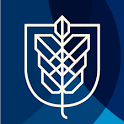
    
 # Retiree Income Projection

<!-- Adjust the spaces and styles as needed for a cute layout -->
<div style="display: flex; align-items: center;">
    <div>
        <h1 style="margin-bottom: 5px;">Hult International Business School</h1>
        <p1 style="margin: 0;">MBAN 2</p1>
        <ul style="list-style-type: none; padding-left: 20px; margin-top: 5px;">
            <li>Alice Destrait</li>
            <li>Sara Kuqja</li>
        </ul>
    </div>
</div>



   
   

In [1]:
# Importing  libraries
import warnings
warnings.filterwarnings("ignore")  
import numpy as np  
import pandas as pd 


In [2]:
# Specify the path to the datasets
data_path = "./Data/"

# Specify the filenames of the datasets
ma_filename = "tax_brackets_MA.csv"
ca_filename = "tax_brackets_CA.csv"
inflation_filename = "inflation_rates.csv"
federal_filename = "federal_tax.csv"
rmd_filename="rmd.csv"
# Read the CSV files and create backup copies
ma_df_data = pd.read_csv(data_path + ma_filename)
ca_df_data = pd.read_csv(data_path + ca_filename)
inflation_df_data = pd.read_csv(data_path + inflation_filename)
federal_df_data = pd.read_csv(data_path + federal_filename)
rmd_df_data=pd.read_csv(data_path + rmd_filename)
# Create working copies of the dataframes for analysis
ma_df = ma_df_data.copy()
ca_df = ca_df_data.copy()
inflation_df = inflation_df_data.copy()
federal_df = federal_df_data.copy()
rmd_df = rmd_df_data.copy()
# Let's check its structure

In [3]:
# Columns to convert to float and replace NaN with 0
columns_to_convert = ['Over(USD)', 'Up to(USD)', 'Base Tax(USD)', '% on excess\t']

# Convert columns to float and replace NaN with 0
for col in columns_to_convert:
    federal_df[col] = pd.to_numeric(federal_df[col], errors='coerce').fillna(0)
    federal_df[col] = federal_df[col].astype(float)


In [4]:
# Providing a summary overview of the structure and attributes in the 'federal_df' DataFrame
federal_df

,Bracket,Over(USD),Up to(USD),Base Tax(USD),% on excess\t
0,1,0.0,22000.0,0.0,10.0
1,2,22000.0,89450.0,2200.0,12.0
2,3,89450.0,190750.0,10294.0,22.0
3,4,190750.0,364200.0,32580.0,24.0
4,5,364200.0,462500.0,74208.0,32.0
5,6,462500.0,693750.0,105664.0,35.0
6,7,693750.0,0.0,186601.5,37.0


In [5]:
# Providing a summary overview of the structure and attributes in the "California" DataFrame
ca_df

,Bracket,Over(USD),Up to(USD),Base Tax(USD),% on excess
0,1,0,20198,0.00,1.10
1,2,20198,47884,222.18,2.20
2,3,47884,75576,831.27,4.40
3,4,75576,104910,2049.72,6.60
4,5,104910,132590,3985.76,8.80
5,6,132590,677278,6421.60,10.23
6,7,677278,812728,62143.18,11.33
7,8,812728,1000000,77489.67,12.43
8,9,1000000,1354550,100767.58,13.53
9,10,1354550,0,148738.19,14.63


In [6]:
# Providing a summary overview of the structure and attributes in the "Massachusetts" DataFrame
ma_df

,Bracket,Flat Tax Rate
0,1,5


In [7]:
# Providing a summary overview of the structure and attributes in the "required minimum distribution" DataFrame
rmd_df

,Age,Distribution Period
0,72,27.4
1,73,26.5
2,74,25.5
3,75,24.6
4,76,23.7
5,77,22.9
6,78,22.0
7,79,21.1
8,80,20.2
9,81,19.4


In [8]:
# Columns to convert to float 
ma_df['Flat Tax Rate']=ma_df['Flat Tax Rate'].astype(float)
for col in ['Over(USD)', 'Up to(USD)', '% on excess']:
    ca_df[col]=ca_df[col].astype(float)
inflation_df['Percentage Change']= inflation_df['Percentage Change'].astype(float)

In [9]:
inflation_df['Percentage Change']= inflation_df['Percentage Change'].astype(float)


In [10]:
ma_df['Flat Tax Rate']=ma_df['Flat Tax Rate'].astype(float)

In [11]:
# Iterate through each column and apply the strip function to remove leading spaces
for column in ca_df.columns:
    if ca_df[column].dtype == 'object':  # Apply only to columns with string/object dtype
        ca_df[column] = ca_df[column].str.strip()


In [18]:
# Input values from the user
savings = float(input("Please Enter your total current savings amount: "))
ira_balance = float(input("Please Enter your IRA balance: "))
annual_expenses = float(input("Enter your annual expenses: "))
current_year = int(input("Enter the current year: "))
current_month= int(input('What is the current month: (in numbers)'))
annual_interest= float(input('What is annual interest rate on your savings: '))
age= int(input('What is your age: '))
annual_ira_interest= float(input('What is annual interest rate on your IRA: '))

# Values saved a second time for calculations
savings_ca=savings
ira_balance_ca=ira_balance
annual_expenses_ca=annual_expenses
current_year_ca=current_year
current_month_ca=current_month
age_ca=age

# Print out the values entered by the user
print(f"Savings: {savings}")
print(f"IRA Balance: {ira_balance}")
print(f"Annual Expenses: {annual_expenses}")
print(f"Current year: {current_year}")
print(f"Current month: {current_month}")
print(f"Annual interest on the savings account: {annual_interest}")
print(f"Your current age: {age}")
print(f"Annual interest on the IRA-account: {annual_ira_interest}")



Savings: 580000.0
IRA Balance: 400000.0
Annual Expenses: 81500.0
Current year: 2023
Current month: 1
Annual interest on the savings account: 0.06
Your current age: 62
Annual interest on the IRA-account: 0.08


In [17]:
# Scenario MA
# Save annual values into monthly values
monthly_int= annual_interest/12
monthly_expenses= annual_expenses/12
monthly_int_ira= annual_ira_interest/12
# Calculating the previous year based on the users current year
past_year= current_year-1
# Creating new dictionary total income per year(will be used for tax calculations)
tot_income={}
tot_income[past_year]=0
tot_income[current_year_ca] = 0
# Locating the tax rate whithin the ma file
ma_tax_rate = ma_df['Flat Tax Rate'].iloc[0]
# Creating new dictionary to keep track of the amount deduced from the IRA account per year(will be used for tax calculations)
amount_income_ira={}
amount_income_ira[past_year]=0
amount_income_ira[current_year_ca]=0
# Creating new dictionary to keep track of the IRA balance per year (will be used to check the RMD condition)
ira_balance_keep={}
ira_balance_keep[past_year]=ira_balance
# Creating new variable for the total taxes paid in MA
total_ma_taxes = 0
# While loop until broke
while ira_balance >=0:
    income= round(savings*monthly_int,2)
    savings= round(savings + income - monthly_expenses,2)
    ira_balance+=round(ira_balance*monthly_int_ira,2)
    tot_income[current_year]+= income
    # If savings becomes negative, get the difference from the IRA account
    if savings < 0:
        amount_income_ira[current_year]-= savings
        ira_balance= ira_balance + savings
        savings = 0
    # Pay previous year's taxes in April    
    if current_month == 4:
        tax_year= current_year-1
        tot_income[tax_year]+=amount_income_ira[tax_year]
        ma_tax = round(tot_income[tax_year]*ma_tax_rate/100,2)
        total_ma_taxes += ma_tax 
        savings-= ma_tax
        fed_tax=0
        for index, row in federal_df.iterrows():
            upper_lim=row['Up to(USD)']
            lower_lim=row['Over(USD)']
            fed_extra_tax=row['% on excess\t']
            base_fed_tax=row['Base Tax(USD)']
            if tot_income[tax_year] <= upper_lim:
                if tax_year != past_year:
                    fed_tax= round(base_fed_tax + (tot_income[tax_year]-lower_lim)*fed_extra_tax/100,2)
                    savings-= fed_tax
                break
        #print(f"Tax of MA of {tax_year} are {ma_tax} US dollar")
        #print(f"Federal taxes of {tax_year} are of {fed_tax} US dollar")
        print(f"{ma_tax}")
        print(f"{fed_tax}")
    current_month= current_month+1
    # Updates values for a new year, adjusts expenses due to inflation, tracks finances, and considers retirement fund distributions based on age.
    if current_month == 13:
        current_month=1
        ira_balance_keep[current_year]=ira_balance
        for index, row in inflation_df.iterrows():
            yearfile=row['Year']
            change=row['Percentage Change']
            if yearfile==current_year:
                monthly_expenses=round(monthly_expenses*(1+(change/100)),2)
                print(f"Monthly expenses: {monthly_expenses}")
        current_year= current_year+1
        tot_income[current_year]=0
        amount_income_ira[current_year]=0
        print(f"Year: {current_year}")
        print(f"Savings: {savings}")
        print(f"IRA Balance: {round(ira_balance,2)}")
        if age >= 72:
            for index, row in rmd_df.iterrows():
                age_rmd=row['Age']
                le_rmd=row['Distribution Period']
                if age==age_rmd:
                    if amount_income_ira[current_year -1] < ira_balance_keep[current_year -1]/le_rmd:
                        ira_balance-=((ira_balance_keep[current_year -1]/le_rmd)-amount_income_ira[current_year -1])
                        savings+=((ira_balance_keep[current_year -1]/le_rmd)-amount_income_ira[current_year -1])
                        amount_income_ira[current_year-1]= ira_balance_keep[current_year -1]/le_rmd
        age+=1
        
else:
    print(f"You ran out of money in the {current_month} month of year {current_year}")
    


0.0
0
Monthly expenses: 7341.45
Year: 2024
Savings: 531994.06
IRA Balance: 433199.8
1674.7
3579.29
Monthly expenses: 7693.11
Year: 2025
Savings: 468777.52
IRA Balance: 469155.17
1506.74
3176.18
Monthly expenses: 7924.9
Year: 2026
Savings: 397918.31
IRA Balance: 508094.81
1307.05
2696.92
Monthly expenses: 8097.43
Year: 2027
Savings: 320535.98
IRA Balance: 550266.43
1086.02
2172.04
Monthly expenses: 8263.67
Year: 2028
Savings: 237028.9
IRA Balance: 595938.27
846.01
1692.01
Monthly expenses: 8434.07
Year: 2029
Savings: 147069.95
IRA Balance: 645400.84
587.16
1174.31
Monthly expenses: 8618.35
Year: 2030
Savings: 50268.74
IRA Balance: 698968.77
308.46
616.91
Monthly expenses: 8812.61
Year: 2031
Savings: 0
IRA Balance: 702842.52
2703.84
6049.22
Monthly expenses: 9012.57
Year: 2032
Savings: 0
IRA Balance: 642246.12
5725.22
15805.96
Monthly expenses: 9217.43
Year: 2033
Savings: 0
IRA Balance: 560677.32
6484.1
19145.04
Monthly expenses: 9427.31
Year: 2034
Savings: 0
IRA Balance: 465473.33
6811.

In [19]:
#Scenario for CA
# Save annual values into monthly values
monthly_int= annual_interest/12
monthly_expenses_ca= annual_expenses/12
monthly_int_ira=annual_ira_interest/12
# Calculating the previous year based on the users current year
past_year= current_year_ca-1
# Creating new dictionary total income per year(will be used for tax calculations)
tot_income_ca={}
tot_income_ca[past_year]=0
tot_income_ca[current_year_ca] = 0
# Creating new dictionary to keep track of the amount deduced from the IRA account per year(will be used for tax calculations)
amount_income_ira_ca={}
amount_income_ira_ca[past_year]=0
amount_income_ira_ca[current_year]=0
# Creating new dictionary to keep track of the IRA balance per year (will be used to check the RMD condition)
ira_balance_keep_ca={}
ira_balance_keep_ca[past_year]=ira_balance_ca
# While loop until broke
while ira_balance_ca >=0:
    income_ca= round(savings_ca*monthly_int,2)
    savings_ca= round(savings_ca + income_ca - monthly_expenses_ca,2)
    ira_balance_ca+=round(ira_balance_ca*monthly_int_ira,2)
    tot_income_ca[current_year_ca]+= income_ca
    # If savings becomes negative, get the difference from the IRA account
    if savings_ca < 0:
        amount_income_ira_ca[current_year_ca]-= savings_ca
        ira_balance_ca= ira_balance_ca + savings_ca
        savings_ca = 0
     # Pay previous  year's taxes in April    
    if current_month_ca == 4:
        tax_year=current_year_ca-1
        tot_income_ca[tax_year]+=amount_income_ira_ca[tax_year]
        ca_tax=0
        fed_tax=0
        for index, row in federal_df.iterrows():
            upper_lim_ca=row['Up to(USD)']
            lower_lim_ca=row['Over(USD)']
            fed_extra_tax_ca=row['% on excess\t']
            base_fed_tax_ca=row['Base Tax(USD)']
            if tot_income_ca[tax_year] <= upper_lim_ca:
                if tax_year != past_year:
                    fed_tax= round(base_fed_tax_ca + (tot_income_ca[tax_year]-lower_lim_ca)*fed_extra_tax_ca/100,2)
                    savings_ca-= fed_tax
                break
        for index, row in ca_df.iterrows():
            upper_lim_ca=row['Up to(USD)']
            lower_lim_ca=row['Over(USD)']
            ca_extra_tax=row['% on excess']
            base_ca_tax=row['Base Tax(USD)']
            if tot_income_ca[tax_year] <= upper_lim_ca:
                if tax_year != past_year:
                    ca_tax= round(base_ca_tax + (tot_income_ca[tax_year]-lower_lim_ca)*ca_extra_tax/100,2)
                    savings_ca-= ca_tax
                break
        print(f"Tax of CA of {tax_year} are {ca_tax} US dollar")
        print(f"Federal taxes of {tax_year} are of {fed_tax} US dollar")
        #print(ca_tax)
        print(fed_tax)
    current_month_ca= current_month_ca+1
    # Updates values for a new year, adjusts expenses due to inflation, tracks finances, and considers retirement fund distributions based on age.
    if current_month_ca == 13:
        current_month_ca=1
        ira_balance_keep_ca[current_year_ca]=ira_balance_ca
        for index, row in inflation_df.iterrows():
            yearfile_ca=row['Year']
            change_ca=row['Percentage Change']
            if yearfile_ca==current_year_ca:
                monthly_expenses_ca=round(monthly_expenses_ca*(1+(change_ca/100)),2)
                print(f"Monthly expenses: {monthly_expenses_ca}")
        current_year_ca= current_year_ca+1
        tot_income_ca[current_year_ca]=0
        amount_income_ira_ca[current_year_ca]=0
        print(f"Year: {current_year_ca}")
        print(f"Savings: {savings_ca}")
        print(f"IRA Balance: {round(ira_balance_ca,2)}")
        if age_ca >= 72:
            for index, row in rmd_df.iterrows():
                age_rmd_ca=row['Age']
                le_rmd_ca=row['Distribution Period']
                if age_ca==age_rmd_ca:
                    if amount_income_ira_ca[current_year_ca -1] < ira_balance_keep_ca[current_year_ca -1]/le_rmd_ca:
                        ira_balance_ca-=((ira_balance_keep_ca[current_year_ca -1]/le_rmd_ca)-amount_income_ira_ca[current_year_ca -1])
                        savings_ca+=((ira_balance_keep_ca[current_year_ca -1]/le_rmd_ca)-amount_income_ira_ca[current_year_ca -1])
                        amount_income_ira_ca[current_year_ca -1]= ira_balance_keep_ca[current_year_ca -1]/le_rmd_ca
        age_ca+=1
else:
    print(f"You ran out of money in the {current_month_ca} month of year {current_year_ca}")

Tax of CA of 2022 are 0 US dollar
Federal taxes of 2022 are of 0 US dollar
0
Monthly expenses: 7341.45
Year: 2024
Savings: 531994.06
IRA Balance: 433199.8
Tax of CA of 2023 are 514.69 US dollar
Federal taxes of 2023 are of 3579.29 US dollar
3579.29
Monthly expenses: 7693.11
Year: 2025
Savings: 469984.74
IRA Balance: 469155.17
Tax of CA of 2024 are 441.83 US dollar
Federal taxes of 2024 are of 3181.85 US dollar
3181.85
Monthly expenses: 7924.9
Year: 2026
Savings: 400302.33
IRA Balance: 508094.81
Tax of CA of 2025 are 355.51 US dollar
Federal taxes of 2025 are of 2711.03 US dollar
2711.03
Monthly expenses: 8097.43
Year: 2027
Savings: 324042.64
IRA Balance: 550266.43
Tax of CA of 2026 are 259.75 US dollar
Federal taxes of 2026 are of 2190.56 US dollar
2190.56
Monthly expenses: 8263.67
Year: 2028
Savings: 241592.48
IRA Balance: 595938.27
Tax of CA of 2027 are 188.86 US dollar
Federal taxes of 2027 are of 1716.93 US dollar
1716.93
Monthly expenses: 8434.07
Year: 2029
Savings: 152572.97
IRA 